Assignment 2 Data Exploration Yaofa Gong 306299097

# Import pandas and geopandas libraries

In [26]:
import pandas as pd
import geopandas as gpd
import os
import folium 

# Find the data folder path.

In [7]:
print("current folder:", os.getcwd())

current folder: /home/jovyan/24W-UP221/up206a-Yaofa


# Confirm the location of the data file.

In [8]:
file_path = '/home/jovyan/24W-UP221/up206a-Yaofa/Data/Intermodal_Terminal_Facilities.geojson'
if os.path.exists(file_path):
    print(f"path has been found: {file_path}")
else:
    print(f"path doesn't exist: {file_path}")

path has been found: /home/jovyan/24W-UP221/up206a-Yaofa/Data/Intermodal_Terminal_Facilities.geojson


# Load the data file. (For this assignment I chose to use the location distribution data from the Intermodal Terminal Facilities in the City of Los Angeles.)

In [4]:
EPIC_LA = gpd.read_file('/home/jovyan/24W-UP221/up206a-Yaofa/Data/Intermodal_Terminal_Facilities.geojson')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


# Look at the first few rows of the data to check if the data was imported successfully.

In [5]:
EPIC_LA.head()

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,addrln2,...,zip,link,use_type,latitude,longitude,date_updated,dis_status,POINT_X,POINT_Y,geometry
0,27829,HSIP Freedom Intermodal_Terminal_Facilities,10292,Transportation,Intermodal Terminal Facilities,Air,National Transportation Atlas Database (NTAD) ...,Emery Forwarding-Inglewood-Ca,None,None,...,90303,http://egis3.lacounty.gov/lms/?p=30277,publish,33.94543,-118.33517,2010-11-01 19:50:56+00:00,None,6.460014e+06,1.802691e+06,POINT (-118.33517 33.94543)
1,27830,HSIP Freedom Intermodal_Terminal_Facilities,10293,Transportation,Intermodal Terminal Facilities,Air,National Transportation Atlas Database (NTAD) ...,Emery Customs Brokers-Los Angelos-Ca,None,None,...,90045,http://egis3.lacounty.gov/lms/?p=30278,publish,33.94531,-118.37597,2010-11-01 19:50:56+00:00,None,6.447639e+06,1.802691e+06,POINT (-118.37597 33.94531)
2,27831,HSIP Freedom Intermodal_Terminal_Facilities,10294,Transportation,Intermodal Terminal Facilities,Air,National Transportation Atlas Database (NTAD) ...,Emery Ocean Services-Los Angeles-Ca,None,None,...,90045,http://egis3.lacounty.gov/lms/?p=30279,publish,33.94531,-118.37597,2010-11-01 19:50:56+00:00,None,6.447639e+06,1.802691e+06,POINT (-118.37597 33.94531)
3,27832,HSIP Freedom Intermodal_Terminal_Facilities,10295,Transportation,Intermodal Terminal Facilities,Air,National Transportation Atlas Database (NTAD) ...,Emery Forwarding-Los Angeles-Ca-Global Sales,None,None,...,90045,http://egis3.lacounty.gov/lms/?p=30280,publish,33.94531,-118.37597,2010-11-01 19:50:56+00:00,None,6.447639e+06,1.802691e+06,POINT (-118.37597 33.94531)
4,27833,HSIP Freedom Intermodal_Terminal_Facilities,1100,Transportation,Intermodal Terminal Facilities,Rail,National Transportation Atlas Database (NTAD) ...,"Pacific Harbor Line, Inc.",None,None,...,90744,http://egis3.lacounty.gov/lms/?p=30281,publish,33.76655,-118.26447,2010-11-01 19:50:56+00:00,None,6.481286e+06,1.737528e+06,POINT (-118.26447 33.76655)


# Initial exploration of the data.

# 1. View the shape of the data.

In [9]:
EPIC_LA.shape

(60, 30)

# 2. View the basic information of the data.

In [10]:
EPIC_LA.info

<bound method DataFrame.info of     OBJECTID                                       source ext_id  \
0      27829  HSIP Freedom Intermodal_Terminal_Facilities  10292   
1      27830  HSIP Freedom Intermodal_Terminal_Facilities  10293   
2      27831  HSIP Freedom Intermodal_Terminal_Facilities  10294   
3      27832  HSIP Freedom Intermodal_Terminal_Facilities  10295   
4      27833  HSIP Freedom Intermodal_Terminal_Facilities   1100   
5      27834  HSIP Freedom Intermodal_Terminal_Facilities   1114   
6      27835  HSIP Freedom Intermodal_Terminal_Facilities   1116   
7      27836  HSIP Freedom Intermodal_Terminal_Facilities   1135   
8      27837  HSIP Freedom Intermodal_Terminal_Facilities   1174   
9      27838  HSIP Freedom Intermodal_Terminal_Facilities   1366   
10     27839  HSIP Freedom Intermodal_Terminal_Facilities   1459   
11     27840  HSIP Freedom Intermodal_Terminal_Facilities   1495   
12     27841  HSIP Freedom Intermodal_Terminal_Facilities   1496   
13     27842  HS

# 3. View all column labels of the data.

In [11]:
EPIC_LA.columns.to_list()

['OBJECTID',
 'source',
 'ext_id',
 'cat1',
 'cat2',
 'cat3',
 'org_name',
 'Name',
 'addrln1',
 'addrln2',
 'city',
 'state',
 'hours',
 'phones',
 'email',
 'url',
 'info1',
 'info2',
 'post_id',
 'description',
 'zip',
 'link',
 'use_type',
 'latitude',
 'longitude',
 'date_updated',
 'dis_status',
 'POINT_X',
 'POINT_Y',
 'geometry']

# 4. Analyze the "cat3" column and transform it into a dataframe. Rename "cat3" to "delivery_mode" and take some sample data from this column.

In [14]:
line_count = EPIC_LA['cat3'].value_counts()
print(line_count)

line_count = line_count.reset_index()
print(line_count)

line_count.columns.to_list()
line_count.columns = ['delivery_mode', 'count']
print(line_count)

cat3
Rail     41
Air      10
Truck     7
Port      2
Name: count, dtype: int64
    cat3  count
0   Rail     41
1    Air     10
2  Truck      7
3   Port      2
  delivery_mode  count
0          Rail     41
1           Air     10
2         Truck      7
3          Port      2


# 5. Draw a simple distribution graph for line_count.

<Axes: title={'center': 'Number of delivery modes'}, xlabel='delivery_mode'>

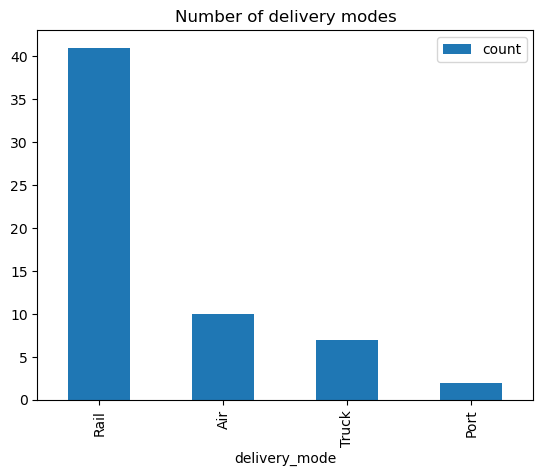

In [16]:
line_count.plot.bar(x = 'delivery_mode', y = 'count', title = 'Number of delivery modes')

# 6. Try pruning the data (take out some of the columns that are needed and filter out the data where the mode of travel is rail, truck, and air).

In [22]:
desired_columns = ['OBJECTID', 'zip', 'cat3', 'Name', 'latitude', 'longitude', 'geometry']
EPIC_LA_trimmed = EPIC_LA[desired_columns].copy()
EPIC_LA_trimmed.loc[(EPIC_LA_trimmed['cat3'] == 'Rail') | (EPIC_LA_trimmed['cat3'] == 'Air') | (EPIC_LA_trimmed['cat3'] == 'Truck')]

,OBJECTID,zip,cat3,Name,latitude,longitude,geometry
0,27829,90303,Air,Emery Forwarding-Inglewood-Ca,33.94543,-118.33517,POINT (-118.33517 33.94543)
1,27830,90045,Air,Emery Customs Brokers-Los Angelos-Ca,33.94531,-118.37597,POINT (-118.37597 33.94531)
2,27831,90045,Air,Emery Ocean Services-Los Angeles-Ca,33.94531,-118.37597,POINT (-118.37597 33.94531)
3,27832,90045,Air,Emery Forwarding-Los Angeles-Ca-Global Sales,33.94531,-118.37597,POINT (-118.37597 33.94531)
4,27833,90744,Rail,"Pacific Harbor Line, Inc.",33.76655,-118.26447,POINT (-118.26447 33.76655)
5,27834,90220,Air,Target Logistic Services,33.87900,-118.22497,POINT (-118.22497 33.87900)
6,27835,90301,Air,Stevens Air Transport,33.95534,-118.37362,POINT (-118.37362 33.95534)
7,27836,90045,Air,Korean Air,33.93150,-118.41641,POINT (-118.41641 33.93150)
8,27837,91505,Air,Ameriflight,34.19443,-118.36010,POINT (-118.36010 34.19443)
9,27838,90045,Air,Los Angeles International Airport,33.94476,-118.40799,POINT (-118.40799 33.94476)


# 7. Try to draw a simple graph from a data file.

<Axes: >

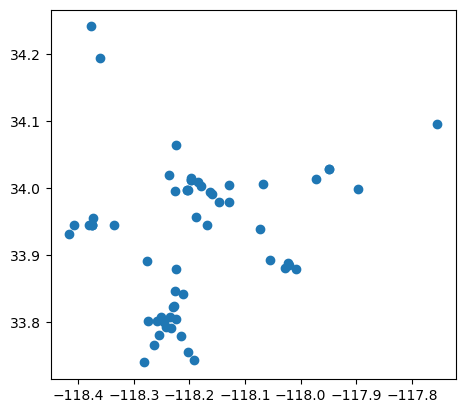

In [23]:
EPIC_LA_trimmed.plot()

# 8. Try to draw a more complex graph from a data file.

<Axes: >

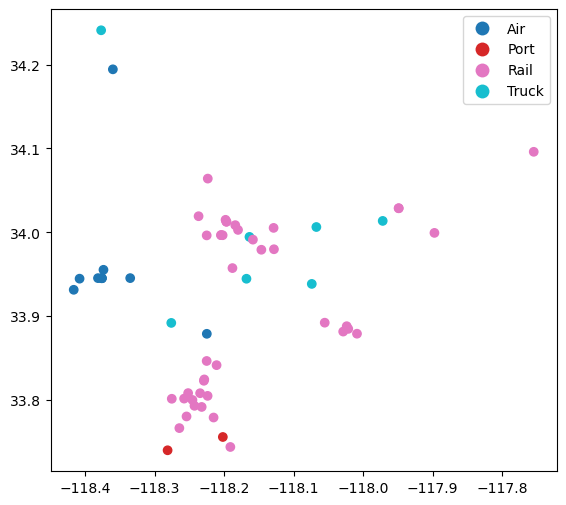

In [25]:
EPIC_LA_trimmed.plot(
            figsize=(10,6),   # edit size
            column = 'cat3',   # choose a column to differentiate colors
            legend = True,     # add a legend          
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }) 

# 9. Try tracing points on an actual map.

In [30]:
# Calculate the location of the general area.
latitude_mean = EPIC_LA_trimmed.latitude.mean()
longitude_mean = EPIC_LA_trimmed.longitude.mean()

# Create a map.
m_assignment2 = folium.Map(location=[latitude_mean, longitude_mean])

In [31]:
# Loop the coordinate points into the map and save it.
for index, row in EPIC_LA_trimmed.iterrows():
    # add folium marker code
    folium.Marker([row.latitude, row.longitude], popup=row.Name	, tooltip=row.Name	).add_to(m_assignment2)
m_assignment2

# 10. Try labeling the colors.

In [32]:
# Add a new column
EPIC_LA_trimmed['color'] = ''

In [34]:
# Name the new column
EPIC_LA_trimmed.loc[EPIC_LA_trimmed['cat3'] == 'Rail', 'color'] = 'blue'
EPIC_LA_trimmed.loc[EPIC_LA_trimmed['cat3'] == 'Truck', 'color'] = 'orange'
EPIC_LA_trimmed.loc[EPIC_LA_trimmed['cat3'] == 'Air', 'color'] = 'red'
EPIC_LA_trimmed.loc[EPIC_LA_trimmed['cat3'] == 'Port', 'color'] = 'purple'

In [35]:
# add the stations with color icons
for index, row in EPIC_LA_trimmed.iterrows():
    tooltip_text = row.cat3 + ' cat3: ' + row.Name
    folium.Marker(
        [row.latitude,row.longitude], 
        popup=row.Name, 
        tooltip=tooltip_text,
        icon=folium.Icon(color=row.color)
    ).add_to(m_assignment2)

# show the map
m_assignment2